# Capstone report

## Preliminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Prepare Dataset

Merge table 11 and table 12

In [2]:
# read table 11 and 12
tb11 = pd.read_csv('table_11.csv', index_col=None)
tb12 = pd.read_csv('table_12.csv', index_col=None)

In [3]:
# merge table 11 and 12 by County ID
ntb12 = tb12.drop(tb12.columns[1:9], axis=1)
tb = pd.merge(tb11, ntb12, how='inner', on='cty')

In [4]:
tb.to_csv('table_11-12.csv', index=False)

In [5]:
tb.columns

Index(['cty', 'county_name', 'cty_pop2000', 'cz', 'cz_name', 'cz_pop2000',
       'statename', 'state_id', 'stateabbrv', 'le_raceadj_q1_F',
       'le_raceadj_q2_F', 'le_raceadj_q3_F', 'le_raceadj_q4_F',
       'le_raceadj_q1_M', 'le_raceadj_q2_M', 'le_raceadj_q3_M',
       'le_raceadj_q4_M', 'count_q1_F', 'count_q2_F', 'count_q3_F',
       'count_q4_F', 'count_q1_M', 'count_q2_M', 'count_q3_M', 'count_q4_M',
       'intersects_msa', 'puninsured2010', 'reimb_penroll_adj10',
       'mort_30day_hosp_z', 'adjmortmeas_amiall30day',
       'adjmortmeas_chfall30day', 'adjmortmeas_pnall30day', 'med_prev_qual_z',
       'primcarevis_10', 'diab_hemotest_10', 'diab_eyeexam_10',
       'diab_lipids_10', 'mammogram_10', 'amb_disch_per1000_10',
       'cs00_seg_inc', 'cs00_seg_inc_pov25', 'cs00_seg_inc_aff75',
       'cs_race_theil_2000', 'gini99', 'poor_share', 'inc_share_1perc',
       'frac_middleclass', 'scap_ski90pcm', 'rel_tot', 'cs_frac_black',
       'cs_frac_hisp', 'unemp_rate', 'pop_d_200

In [6]:
len(tb)

1442

In [7]:
tb.head(5)

,cty,county_name,cty_pop2000,cz,cz_name,cz_pop2000,statename,state_id,stateabbrv,le_raceadj_q1_F,...,ccd_exp_tot,ccd_pup_tch_ratio,score_r,cs_educ_ba,e_rank_b,cs_fam_wkidsinglemom,crime_total,subcty_exp_pc,taxrate,tax_st_diff_top20
0,1001,Autauga,43671,11101,Montgomery,367927.0,Alabama,1,AL,80.83063,...,4.460057,19.715980,-7.308133,18.0,41.87288,0.191595,0.009353,1059.6690,0.011183,0.0
1,1003,Baldwin,140415,11001,Mobile,599405.0,Alabama,1,AL,83.41104,...,4.596590,16.850983,-13.628750,23.1,44.49239,0.186778,0.007371,2209.9100,0.011756,0.0
2,1005,Barbour,29038,10301,Eufaula,61458.0,Alabama,1,AL,84.54345,...,4.734407,16.656711,-15.955110,10.9,37.71876,0.337853,0.007749,1570.2480,0.012059,0.0
3,1009,Blount,51024,10700,Birmingham,1038182.0,Alabama,1,AL,81.59277,...,3.998976,19.323810,-10.218140,9.6,49.04332,0.121988,0.002019,987.4388,0.007012,0.0
4,1015,Calhoun,112249,9600,LaGrange,457299.0,Alabama,1,AL,80.31331,...,4.285027,19.376473,-7.025562,15.2,42.28995,0.242177,0.008780,1722.6160,0.011815,0.0


In [8]:
# Get average values of life expectancy
count_M = tb.count_q1_M + tb.count_q2_M + tb.count_q3_M + tb.count_q4_M
count_F = tb.count_q1_F + tb.count_q2_F + tb.count_q3_F + tb.count_q4_F
le_M = (tb.le_raceadj_q1_M * tb.count_q1_M 
            + tb.le_raceadj_q2_M * tb.count_q2_M 
            + tb.le_raceadj_q3_M * tb.count_q3_M 
            + tb.le_raceadj_q4_M * tb.count_q4_M) / count_M
le_F = (tb.le_raceadj_q1_F * tb.count_q1_F 
            + tb.le_raceadj_q2_F * tb.count_q2_F 
            + tb.le_raceadj_q3_F * tb.count_q3_F 
            + tb.le_raceadj_q4_F * tb.count_q4_F) / count_F
tb['le'] = (le_M * count_M + le_F * count_F) / (count_M + count_F)

In [9]:
tb.head(5)

,cty,county_name,cty_pop2000,cz,cz_name,cz_pop2000,statename,state_id,stateabbrv,le_raceadj_q1_F,...,ccd_pup_tch_ratio,score_r,cs_educ_ba,e_rank_b,cs_fam_wkidsinglemom,crime_total,subcty_exp_pc,taxrate,tax_st_diff_top20,le
0,1001,Autauga,43671,11101,Montgomery,367927.0,Alabama,1,AL,80.83063,...,19.715980,-7.308133,18.0,41.87288,0.191595,0.009353,1059.6690,0.011183,0.0,81.091187
1,1003,Baldwin,140415,11001,Mobile,599405.0,Alabama,1,AL,83.41104,...,16.850983,-13.628750,23.1,44.49239,0.186778,0.007371,2209.9100,0.011756,0.0,83.435263
2,1005,Barbour,29038,10301,Eufaula,61458.0,Alabama,1,AL,84.54345,...,16.656711,-15.955110,10.9,37.71876,0.337853,0.007749,1570.2480,0.012059,0.0,82.808376
3,1009,Blount,51024,10700,Birmingham,1038182.0,Alabama,1,AL,81.59277,...,19.323810,-10.218140,9.6,49.04332,0.121988,0.002019,987.4388,0.007012,0.0,82.485203
4,1015,Calhoun,112249,9600,LaGrange,457299.0,Alabama,1,AL,80.31331,...,19.376473,-7.025562,15.2,42.28995,0.242177,0.008780,1722.6160,0.011815,0.0,81.344830


In [10]:
tb.columns

Index(['cty', 'county_name', 'cty_pop2000', 'cz', 'cz_name', 'cz_pop2000',
       'statename', 'state_id', 'stateabbrv', 'le_raceadj_q1_F',
       'le_raceadj_q2_F', 'le_raceadj_q3_F', 'le_raceadj_q4_F',
       'le_raceadj_q1_M', 'le_raceadj_q2_M', 'le_raceadj_q3_M',
       'le_raceadj_q4_M', 'count_q1_F', 'count_q2_F', 'count_q3_F',
       'count_q4_F', 'count_q1_M', 'count_q2_M', 'count_q3_M', 'count_q4_M',
       'intersects_msa', 'puninsured2010', 'reimb_penroll_adj10',
       'mort_30day_hosp_z', 'adjmortmeas_amiall30day',
       'adjmortmeas_chfall30day', 'adjmortmeas_pnall30day', 'med_prev_qual_z',
       'primcarevis_10', 'diab_hemotest_10', 'diab_eyeexam_10',
       'diab_lipids_10', 'mammogram_10', 'amb_disch_per1000_10',
       'cs00_seg_inc', 'cs00_seg_inc_pov25', 'cs00_seg_inc_aff75',
       'cs_race_theil_2000', 'gini99', 'poor_share', 'inc_share_1perc',
       'frac_middleclass', 'scap_ski90pcm', 'rel_tot', 'cs_frac_black',
       'cs_frac_hisp', 'unemp_rate', 'pop_d_200

## In-depth analysis using machine learning

### 1. Linear Regression

In [11]:
# Fitting Linear Regression using sklearn
from sklearn.linear_model import LinearRegression

In [12]:
X = tb.loc[:, 'intersects_msa':'tax_st_diff_top20']
y = tb['le']

In [13]:
len(X.columns)

48

#### 1) Use all 48 predictors to fit linear regression model

In [14]:
# Creates a LinearRegression object
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Estimated intercept and coefficients

In [15]:
print('Estimated intercept:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'Coefficients'])

Estimated intercept: 959153.711011
Number of coefficients: 48


,features,Coefficients
0,intersects_msa,0.011047
1,puninsured2010,-0.012985
2,reimb_penroll_adj10,-0.000150
3,mort_30day_hosp_z,485.501828
4,adjmortmeas_amiall30day,-8377.776579
5,adjmortmeas_chfall30day,-11360.395276
6,adjmortmeas_pnall30day,-11116.467798
7,med_prev_qual_z,87409.622923
8,primcarevis_10,-2372.975639
9,diab_hemotest_10,-3170.275235


We can see that some features have much higher coefficients: 
mort_30day_hosp_z, adjmortmeas_amiall30day, adjmortmeas_chfall30day, adjmortmeas_pnall30day, med_prev_qual_z, primcarevis_10, diab_hemotest_10, diab_eyeexam_10, diab_lipids_10, mammogram_10, amb_disch_per1000_10 

In [16]:
print('Coefficient of determination R^2 of the prediction:', lm.score(X,y))

Coefficient of determination R^2 of the prediction: 0.809854570817


#### Predict Life Expectancy

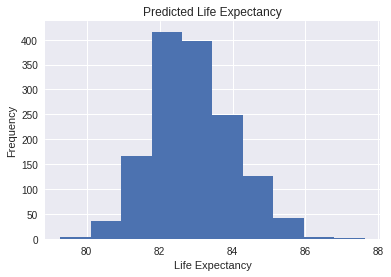

In [17]:
# Plot a histogram of all the predicted prices
plt.hist(lm.predict(X))
plt.title('Predicted Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

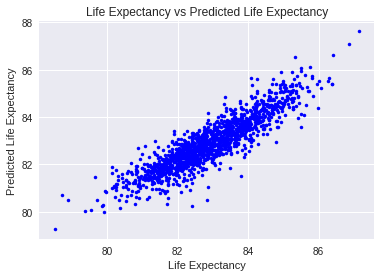

In [18]:
# True prices compared to the predicted prices
plt.plot(y, lm.predict(X), 'b.')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy vs Predicted Life Expectancy')

##### Residual sum of squares

In [19]:
print(np.sum((y - lm.predict(X)) ** 2))

419.52570040304505


##### Mean squared error

In [20]:
print(np.mean((y - lm.predict(X)) ** 2))

0.29093321803262484


#### 2) Use some predictors to fit linear regression model

In [21]:
# Use features with high coefficient in last model
X1 = tb.loc[:, 'mort_30day_hosp_z':'amb_disch_per1000_10']

In [22]:
lm1 = LinearRegression()
lm1.fit(X1, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Estimated intercept and coefficients

In [23]:
print('Estimated intercept:', lm1.intercept_)
print('Number of coefficients:', len(lm1.coef_))
pd.DataFrame(list(zip(X1.columns, lm1.coef_)), columns = ['features', 'Coefficients'])

Estimated intercept: 22240.0846427
Number of coefficients: 11


,features,Coefficients
0,mort_30day_hosp_z,-4197.936425
1,adjmortmeas_amiall30day,72400.158879
2,adjmortmeas_chfall30day,98240.638894
3,adjmortmeas_pnall30day,96068.471768
4,med_prev_qual_z,5015.076497
5,primcarevis_10,-136.172774
6,diab_hemotest_10,-181.877852
7,diab_eyeexam_10,-152.110288
8,diab_lipids_10,-158.974517
9,mammogram_10,-134.080626


We can see that some features have much higher coefficients: mort_30day_hosp_z, adjmortmeas_amiall30day, adjmortmeas_chfall30day, adjmortmeas_pnall30day, med_prev_qual_z

In [24]:
print('Coefficient of determination R^2 of the prediction:', lm1.score(X1,y))

Coefficient of determination R^2 of the prediction: 0.549892244786


It seems that this model is more accurate.

#### Predict Life Expectancy

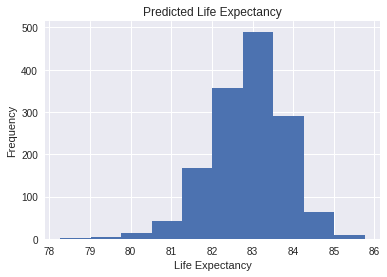

In [26]:
# Plot a histogram of all the predicted prices
plt.hist(lm1.predict(X1))
plt.title('Predicted Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

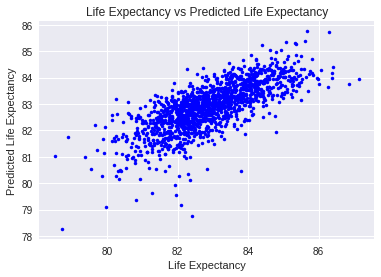

In [27]:
# True prices compared to the predicted prices
plt.plot(y, lm1.predict(X1), 'b.')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy vs Predicted Life Expectancy')

##### Residual sum of squares

In [29]:
print(np.sum((y - lm1.predict(X1)) ** 2))

993.091298980959


##### Mean squared error

In [30]:
print(np.mean((y - lm1.predict(X1)) ** 2))

0.6886902212073225


#### 3) Use less predictors to fit linear regression model

In [31]:
# Use less features with high coefficient in last model
X2 = tb.loc[:, 'mort_30day_hosp_z':'med_prev_qual_z']
lm2 = LinearRegression()
lm2.fit(X2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Estimated intercept and coefficients

In [32]:
print('Estimated intercept:', lm2.intercept_)
print('Number of coefficients:', len(lm2.coef_))
pd.DataFrame(list(zip(X2.columns, lm2.coef_)), columns = ['features', 'Coefficients'])

Estimated intercept: -86211.5763363
Number of coefficients: 5


,features,Coefficients
0,mort_30day_hosp_z,-11095.020596
1,adjmortmeas_amiall30day,191358.882161
2,adjmortmeas_chfall30day,259643.902280
3,adjmortmeas_pnall30day,253922.428573
4,med_prev_qual_z,0.817841


In [33]:
print('Coefficient of determination R^2 of the prediction:', lm2.score(X2,y))

Coefficient of determination R^2 of the prediction: 0.42827888731


#### Predict Life Expectancy

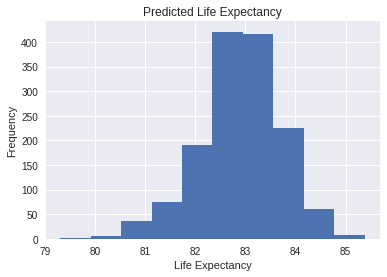

In [34]:
# Plot a histogram of all the predicted prices
plt.hist(lm2.predict(X2))
plt.title('Predicted Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

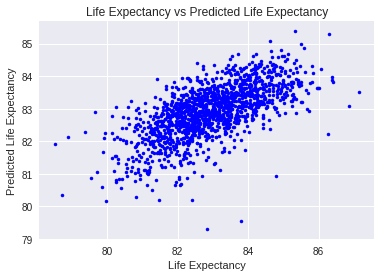

In [35]:
# True prices compared to the predicted prices
plt.plot(y, lm2.predict(X2), 'b.')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Life Expectancy vs Predicted Life Expectancy')

##### Residual sum of squares

In [36]:
print(np.sum((y - lm2.predict(X2)) ** 2))

1261.4118638922619


##### Mean squared error

In [38]:
print(np.mean((y - lm2.predict(X2)) ** 2))

0.8747655089405422


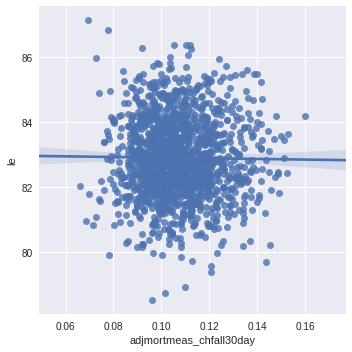

In [39]:
sns.lmplot(x='adjmortmeas_chfall30day', y='le', data=tb)

#### 4) Training and Test Data sets

In [40]:
# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1153, 11)
(289, 11)
(1153,)
(289,)


In [41]:
# Build a linear regression model using training data sets
lm = LinearRegression()
lm.fit(X_train, y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [43]:
# Calculate the mean squared error
print("Fit a model X_train, and calculate MSE with y_train:", np.mean((y_train - pred_train) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, y_test:", np.mean((y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with y_train: 0.6787970323495132
Fit a model X_train, and calculate MSE with X_test, y_test: 0.7386137567040068


##### Residual plots

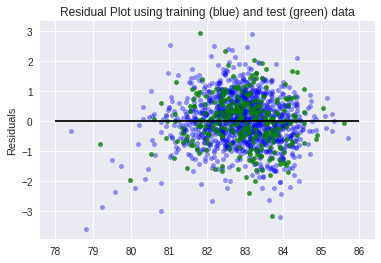

In [50]:
plt.scatter(pred_train, pred_train - y_train, c='b', s=20, alpha=0.4)
plt.scatter(pred_test, pred_test - y_test, c='g', s=20, alpha=0.8)
plt.hlines(y = 0, xmin=78, xmax = 86)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

### 2. Support Vector Machines

### 3. Random Forests